<a href="https://colab.research.google.com/github/ghafoor545/DEP-_ML/blob/main/Classifying_Emails_as_Spam_or_Not_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **2. Load the Dataset**

In [36]:
# Display the first few rows to identify the correct text column
print(df.head())
print(df.columns)


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a

# **3. Data Cleaning and Preprocessing**

In [41]:
# Drop the 'Email No.' column
df = df.drop(columns=['Email No.'])

# Separate features (X) and target (y)
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Display the shapes of X and y to confirm
print(X.shape)
print(y.shape)


(5172, 3000)
(5172,)


# **4. Feature Extraction**

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **5. Model Selection and Training**
Naive Bayes Classifier

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9484536082474226
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1097
           1       0.88      0.95      0.92       455

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.803479381443299
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      1097
           1       0.92      0.36      0.52       455

    accuracy                           0.80      1552
   macro avg       0.85      0.67      0.70      1552
weighted avg       0.83      0.80      0.77      1552



# **6. Model Evaluation and Fine-Tuning**

In [48]:
# Confusion Matrix for Naive Bayes
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Confusion Matrix for SVM
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Fine-tuning or hyperparameter optimization can be done here (e.g., using GridSearchCV)


Naive Bayes Confusion Matrix:
 [[1039   58]
 [  22  433]]
SVM Confusion Matrix:
 [[1082   15]
 [ 290  165]]


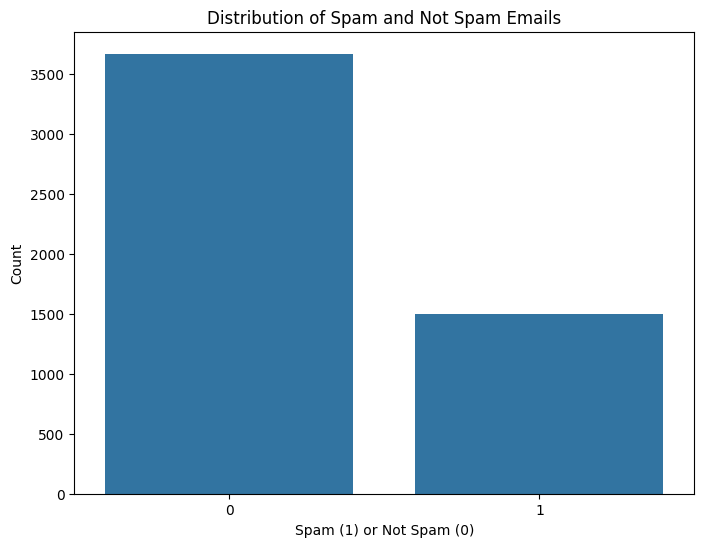

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Prediction', data=df)
plt.title("Distribution of Spam and Not Spam Emails")
plt.xlabel("Spam (1) or Not Spam (0)")
plt.ylabel('Count')
plt.show()
